# Regression Analysis on News Documents (paper draft version)

There are a couple of points about the analysis in the draft version:
* We did not remove the "DESPL" which is the source of warning in PCA since it is highly correlated with "DESSC"
* The way that I chose the number of PCA components was not correct and resulted in 33 components in the PCA --instead of 22.
* Truth labels are not included in fitting the models --although we explicitly mentioned this in the paper.

In [1]:
# reading the excel file which includes all the information
library("readxl")
my_data <- read_excel("data/FakeNewsNet/processed/fakenewsnet_full_draft.xlsx")
head(my_data)

DESSC,DESWC,DESPL,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,DESWLltd,PCNARz,⋯,WRDHYPv,WRDHYPnv,RDFRE,RDFKGL,RDL2,CREL,CRELWD,CRELSC,shares,label
21,552,21,26.286,15.897,1.500,0.781,4.654,2.427,0.071,⋯,1.745,2.293,53.255,12.362,12.648,2,0.003642987,0.09090909,2.564949,1
57,1363,57,24.123,10.360,1.742,1.033,5.272,2.906,-1.082,⋯,2.069,2.288,35.191,14.291,8.408,4,0.002945508,0.07017544,3.465736,1
22,602,22,27.409,9.231,1.575,0.929,4.664,2.659,0.336,⋯,1.284,1.494,45.816,13.667,22.702,2,0.003322259,0.09090909,2.995732,1
36,751,36,20.917,15.249,1.597,0.889,4.736,2.572,0.353,⋯,1.702,1.791,50.555,11.390,12.508,2,0.002663116,0.05555556,2.302585,1
9,197,9,21.889,13.896,1.711,1.061,5.066,3.042,-0.013,⋯,1.894,1.953,39.867,13.137,14.195,0,0.000000000,0.00000000,4.779123,1
17,364,17,21.824,11.566,1.668,0.969,5.102,2.752,-0.782,⋯,1.835,2.001,43.989,12.443,13.695,1,0.002747253,0.05882353,5.056246,1


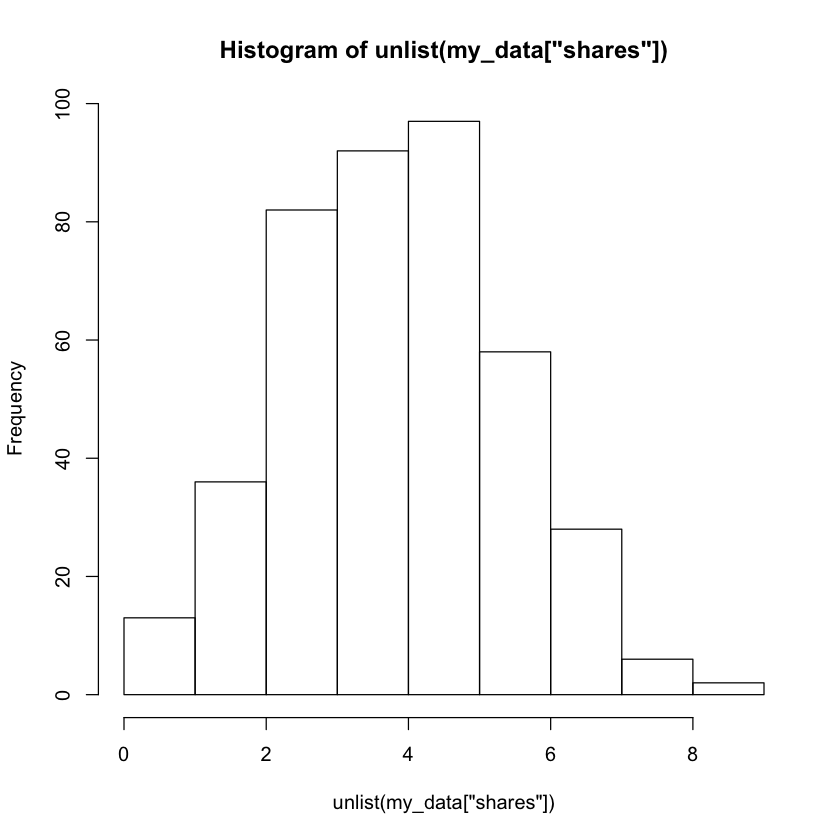

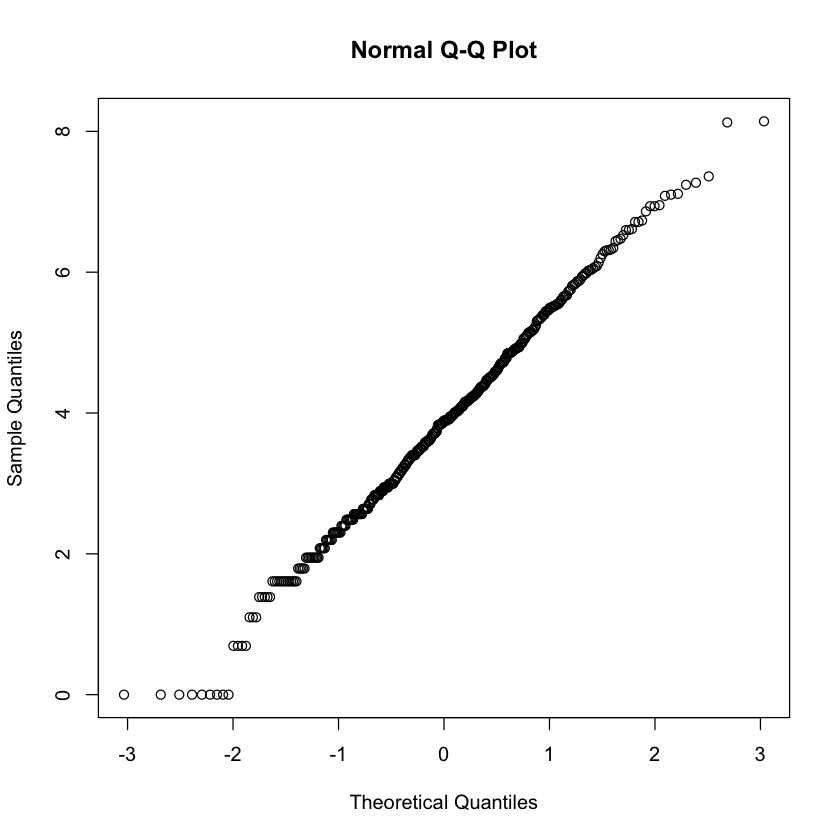

In [2]:
# plotting the normal distribution and probability plot
hist(unlist(my_data["shares"]))
qqnorm(unlist(my_data["shares"]))

## Principal Component Analysis (PCA)
In this section, we first run a PCA on all the indexes we have from the coh-metrix to reduce the number of features. Then, using the scores from the PCA model, we run a linear regression analysis to find the significant components in predicting the number of shares.

In [7]:
# Principal Component Analysis (PCA)
# ----------------------------------
# to install the "psych" package, uncomment the two following lines:
# options(download.file.method = "wget")
# install.packages("psych")
library("psych")

# dropping the columns that we do not want in the regression analysis.
truth_labels <- my_data["label"]
# in the draft version, I did not remove "DESPL" which is apparently the source of warning since it is highly correlated with "DESSC"
drops <- c("X__1", "label", "shares")
x <- my_data[, !(names(my_data) %in% drops)]
y <- my_data["shares"]

# I chose 33 components which based on our conersation was not the best number of components and my decision was wrong
pca <- psych::principal(x, nfactors=33, rotate="varimax")
print(pca$loadings, cutoff = 0.4, sort = TRUE)

# linear regression using the PCA scores
# truth_labels are not included
lin_model <- lm(unlist(y) ~ pca$scores)
summary(lin_model)

Warning message in log(det(m.inv.r)):
“NaNs produced”The determinant of the smoothed correlation was zero.
This means the objective function is not defined for the null model either.
The Chi square is thus based upon observed correlations.
In factor.stats, the correlation matrix is singular, an approximation is used
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“In factor.stats, the correlation matrix is singular, and we could not calculate the beta weights for factor score estimates”Warning message in psych::principal(x, nfactors = 33, rotate = "varimax"):
“The matrix is not positive semi-definite, scores found from Structure loadings”


Loadings:
          RC1    RC2    RC7    RC5    RC3    RC6    RC30   RC23   RC20   RC9   
DESWLlt   -0.633                                            0.629              
PCNARz     0.871                                                               
PCNARp     0.874                                                               
CRFANP1    0.827                                                               
CRFANPa    0.824                                                               
SYNNP     -0.707                                                               
DRVP       0.576                                                               
WRDNOUN   -0.707                                                               
WRDVERB    0.562                                                               
WRDPRO     0.886                                                               
WRDPRP3s   0.583                                                               
WRDFRQc    0.643             


Call:
lm(formula = unlist(y) ~ pca$scores)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5153 -0.9672 -0.1078  1.0529  4.5750 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.849895   0.073826  52.148  < 2e-16 ***
pca$scoresRC1  -0.008811   0.026235  -0.336 0.737179    
pca$scoresRC2   0.047923   0.024063   1.992 0.047136 *  
pca$scoresRC7  -0.061295   0.030496  -2.010 0.045143 *  
pca$scoresRC5   0.008436   0.021083   0.400 0.689294    
pca$scoresRC3   0.027519   0.038646   0.712 0.476851    
pca$scoresRC6   0.033837   0.022660   1.493 0.136200    
pca$scoresRC30 -0.111587   0.045180  -2.470 0.013957 *  
pca$scoresRC23 -0.064873   0.050164  -1.293 0.196721    
pca$scoresRC20 -0.052936   0.046820  -1.131 0.258927    
pca$scoresRC9  -0.011933   0.037525  -0.318 0.750668    
pca$scoresRC11 -0.023034   0.044481  -0.518 0.604874    
pca$scoresRC13 -0.064279   0.052497  -1.224 0.221547    
pca$scoresRC12  0.047798   0.055931   0.855 0.393